In [ ]:
import os
import glob
from IPython.display import Image, display


In [ ]:
display.clear_output()

AttributeError: ignored

In [ ]:
!nvidia-smi

Thu Nov  9 15:51:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content/datasets


In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WbDl1xC0cXd5V9FYXfba")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
dataset = project.version(1).download("yolov5")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov5pytorch:: 100%|██████████| 3458/3458 [00:00<00:00, 10129.60it/s]


In [ ]:
%cd {HOME}

/content/datasets


In [ ]:
%cd {dataset.location}

/content/datasets/datasets/American-Sign-Language-Letters-1


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=80 imgsz=800

/content
Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/American-Sign-Language-Letters-1/data.yaml, epochs=80, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1679816683.3559dbcd1906.6609.0  train_batch6650.jpg
F1_curve.png					    train_batch6651.jpg
labels_correlogram.jpg				    train_batch6652.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights


/content


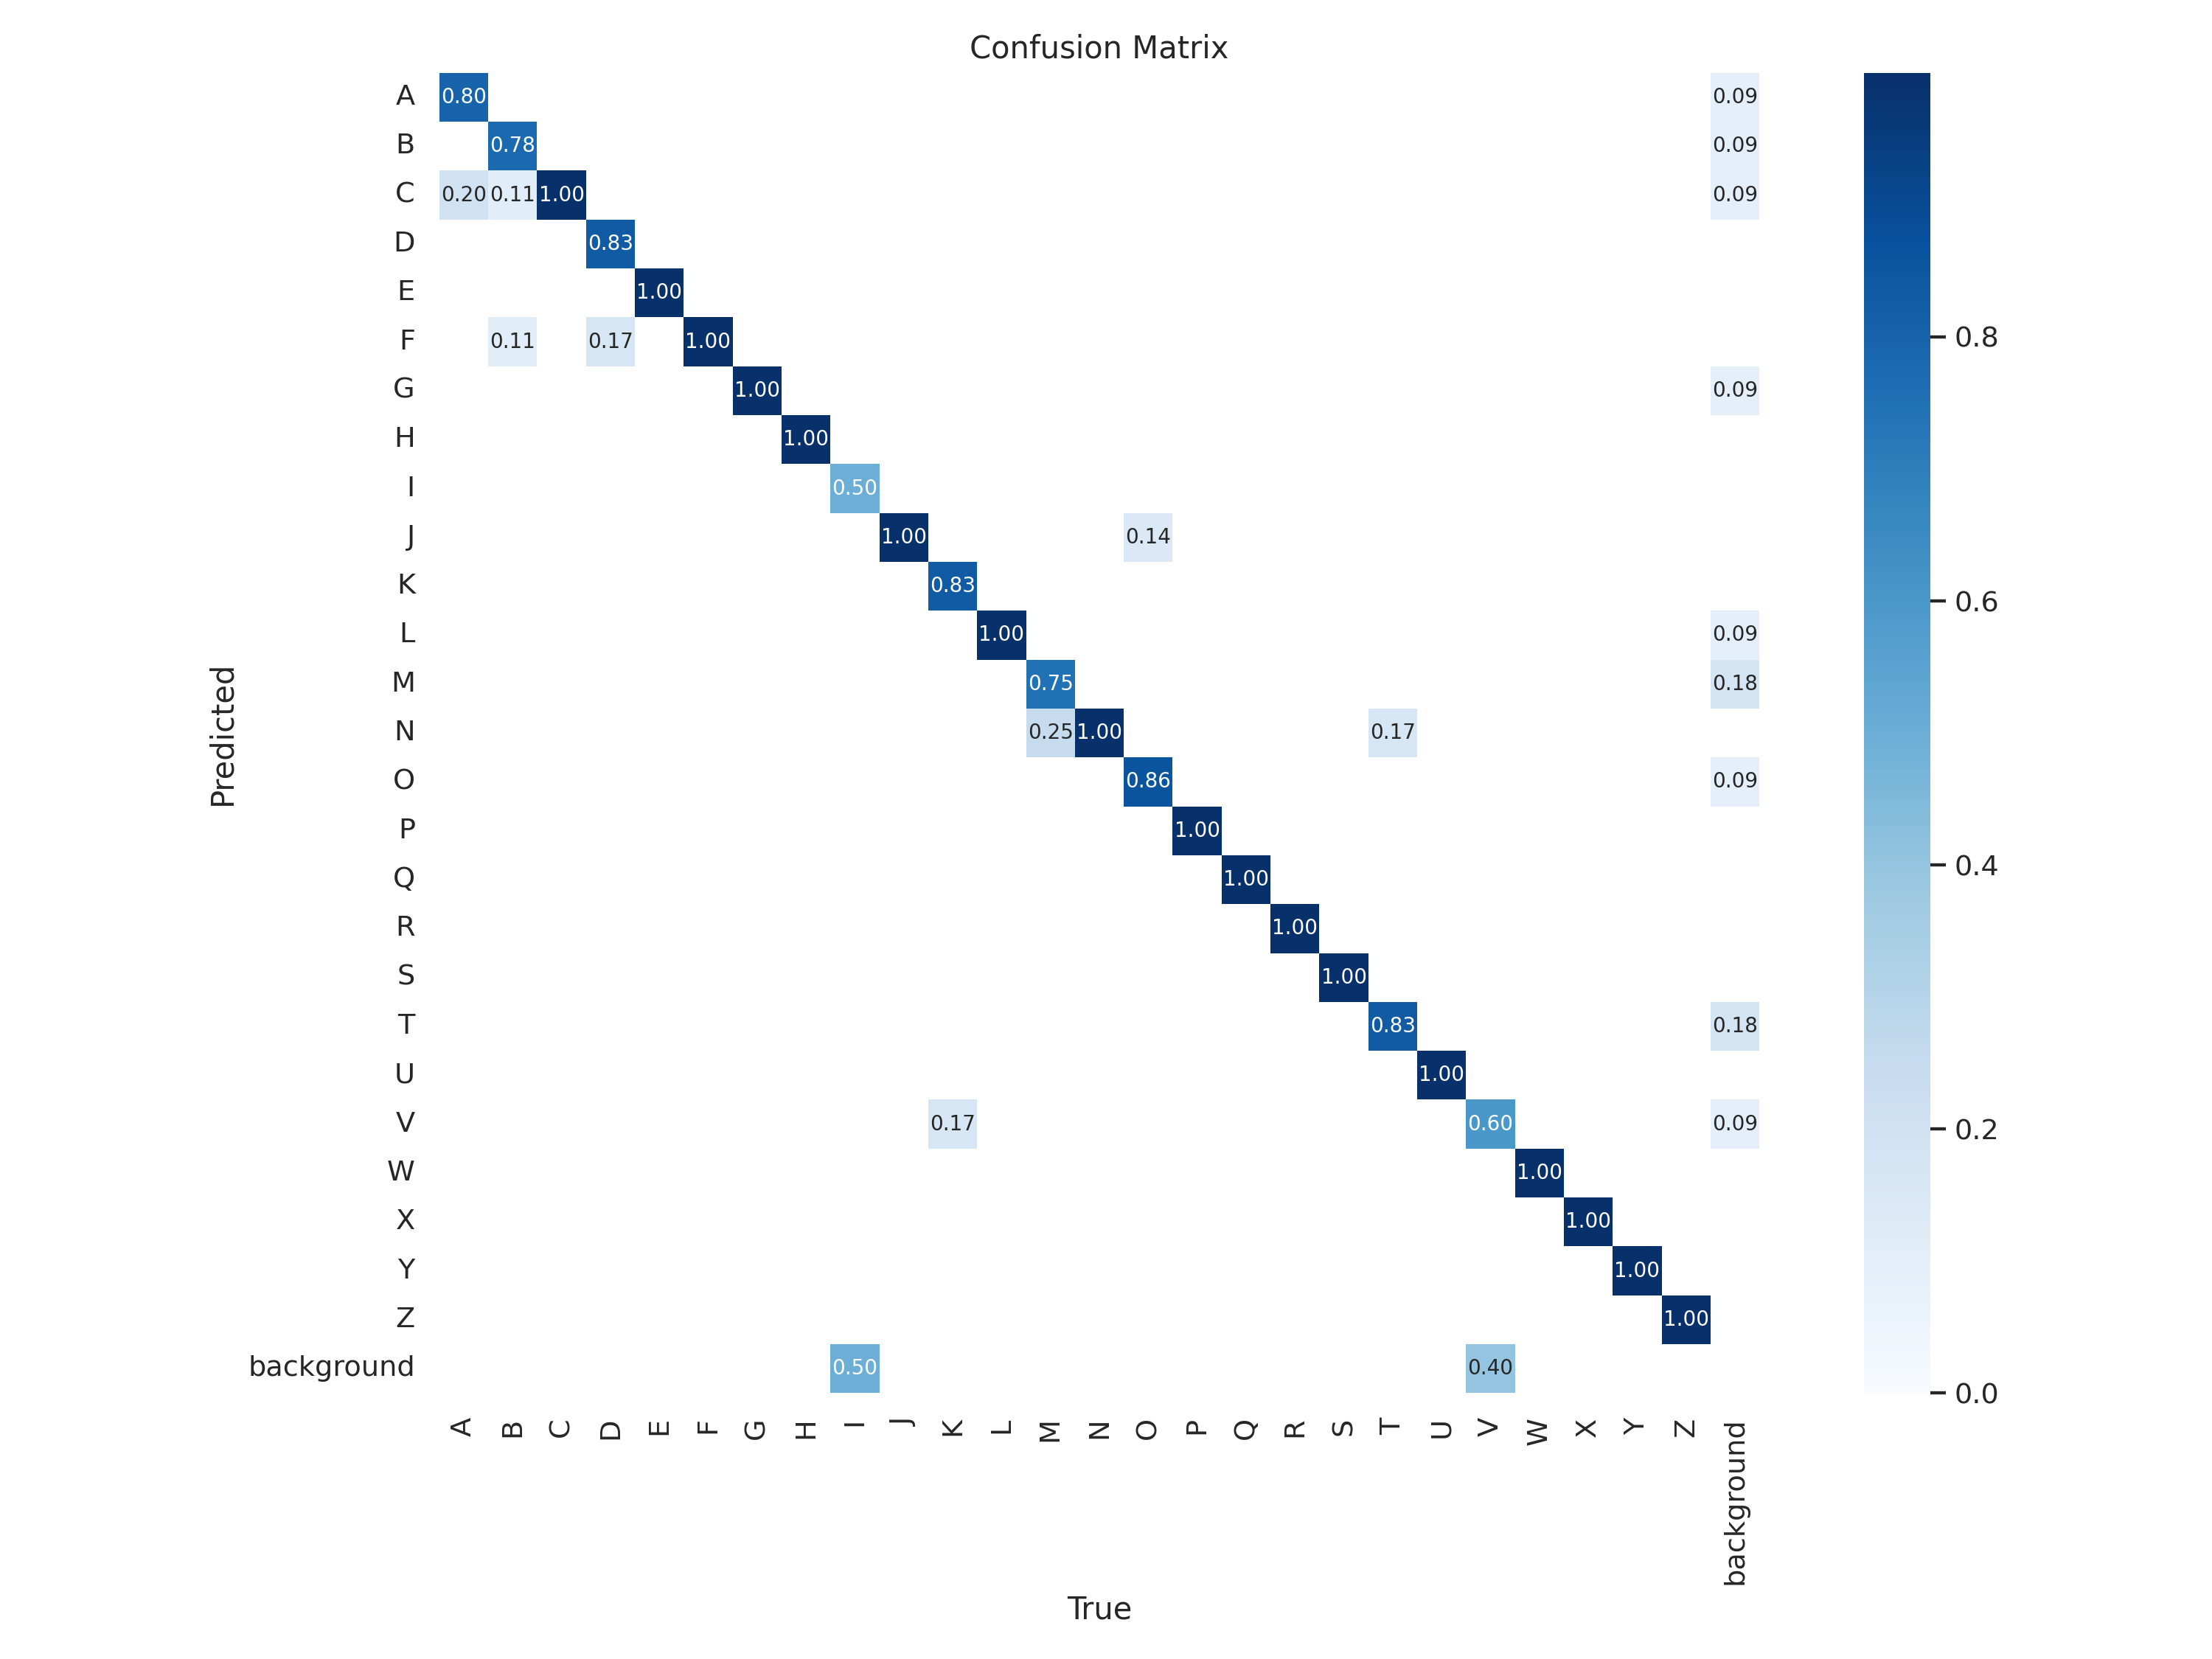

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

/content


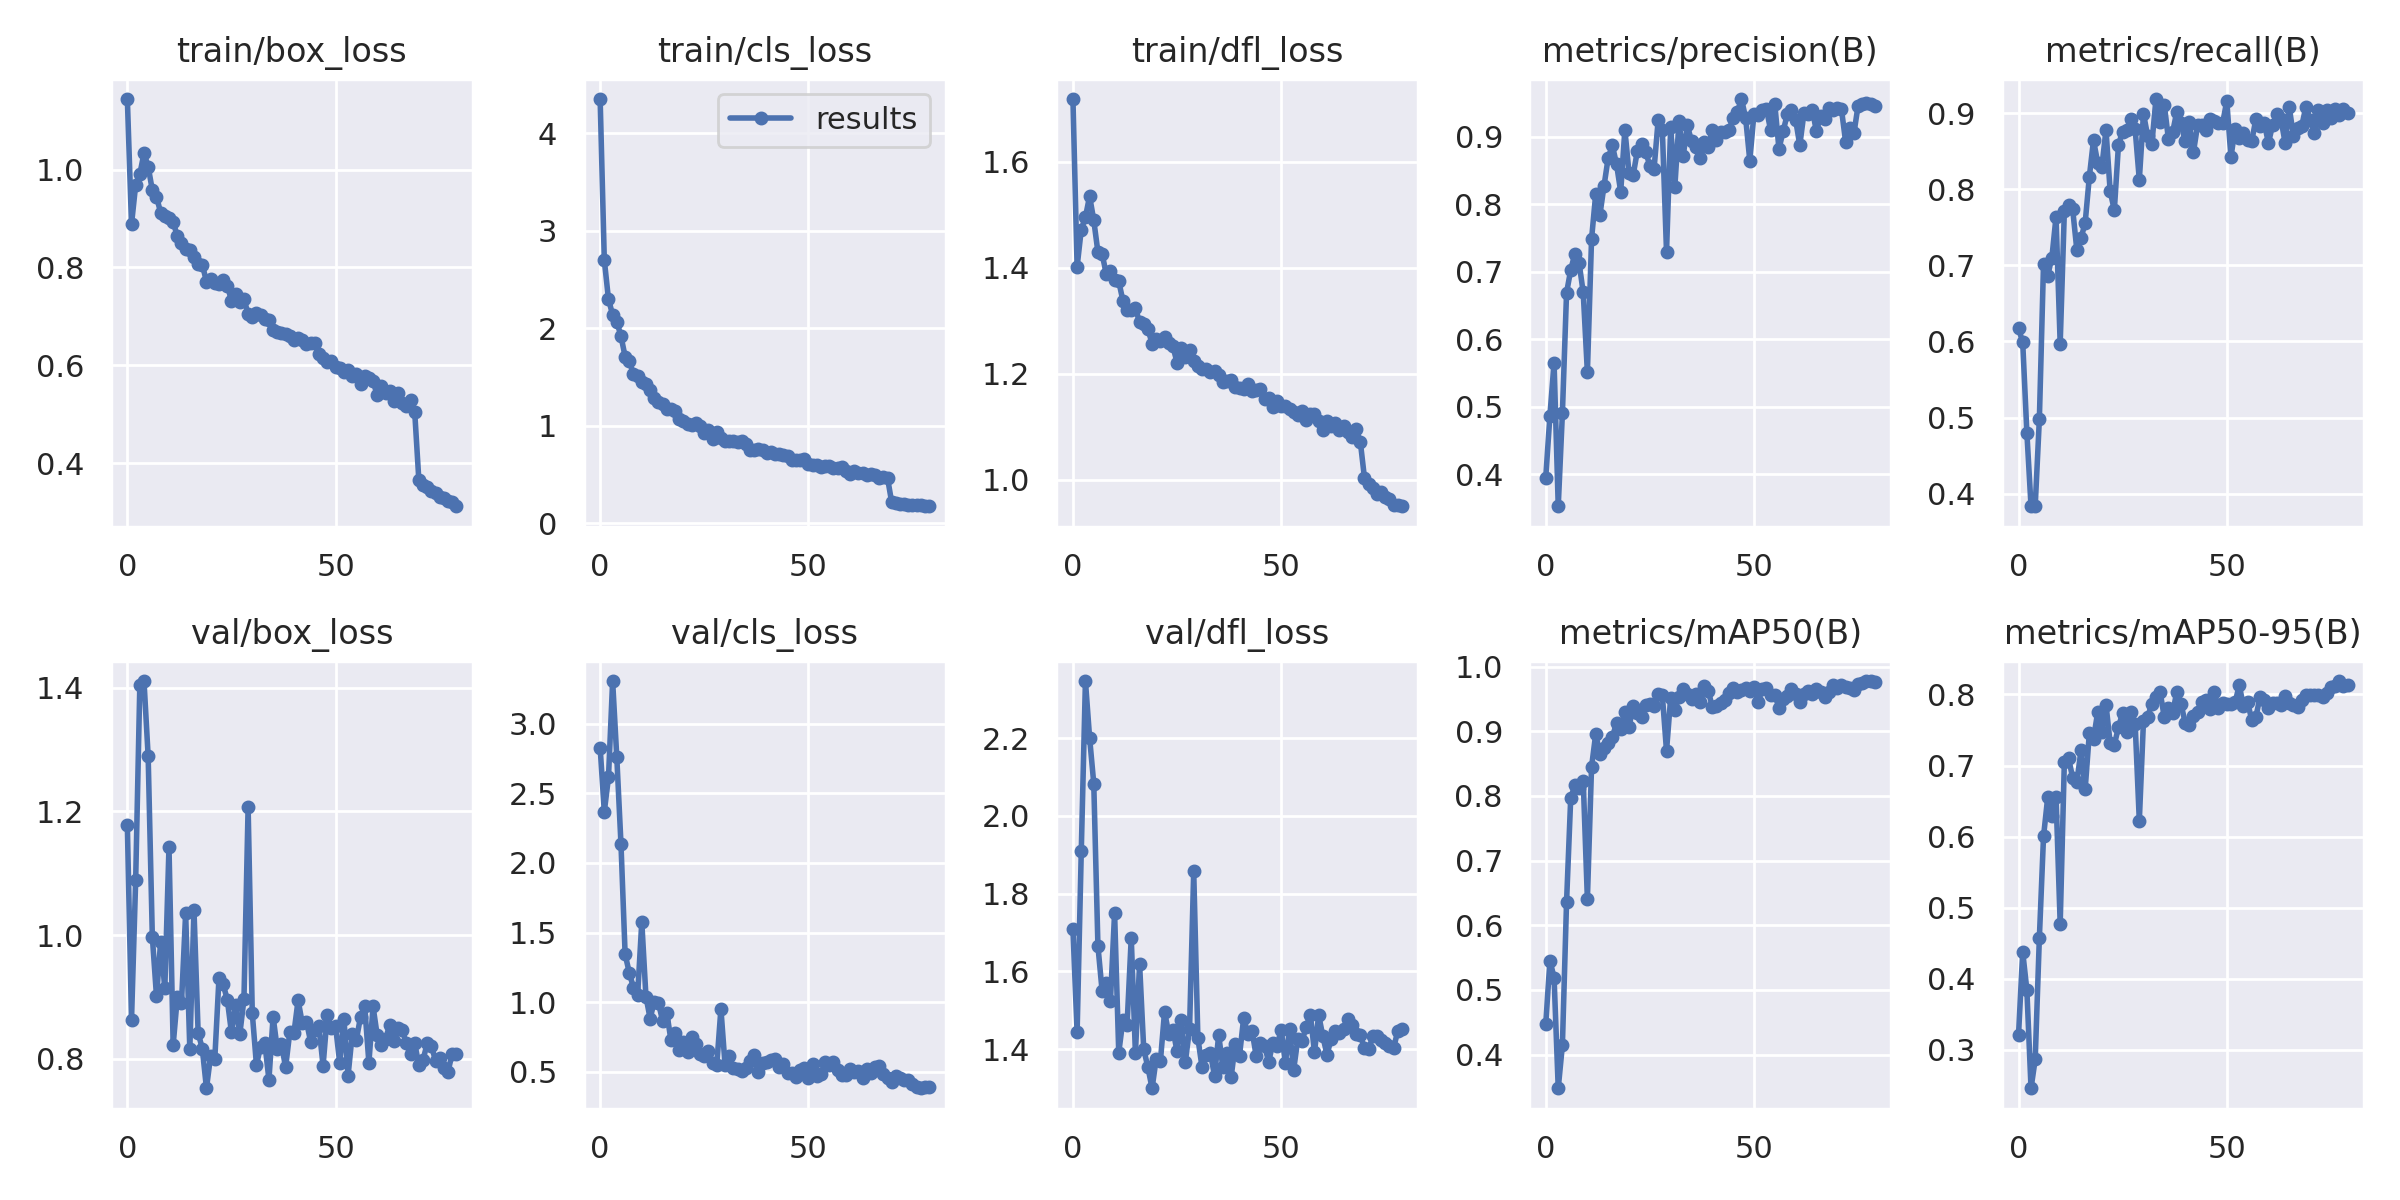

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


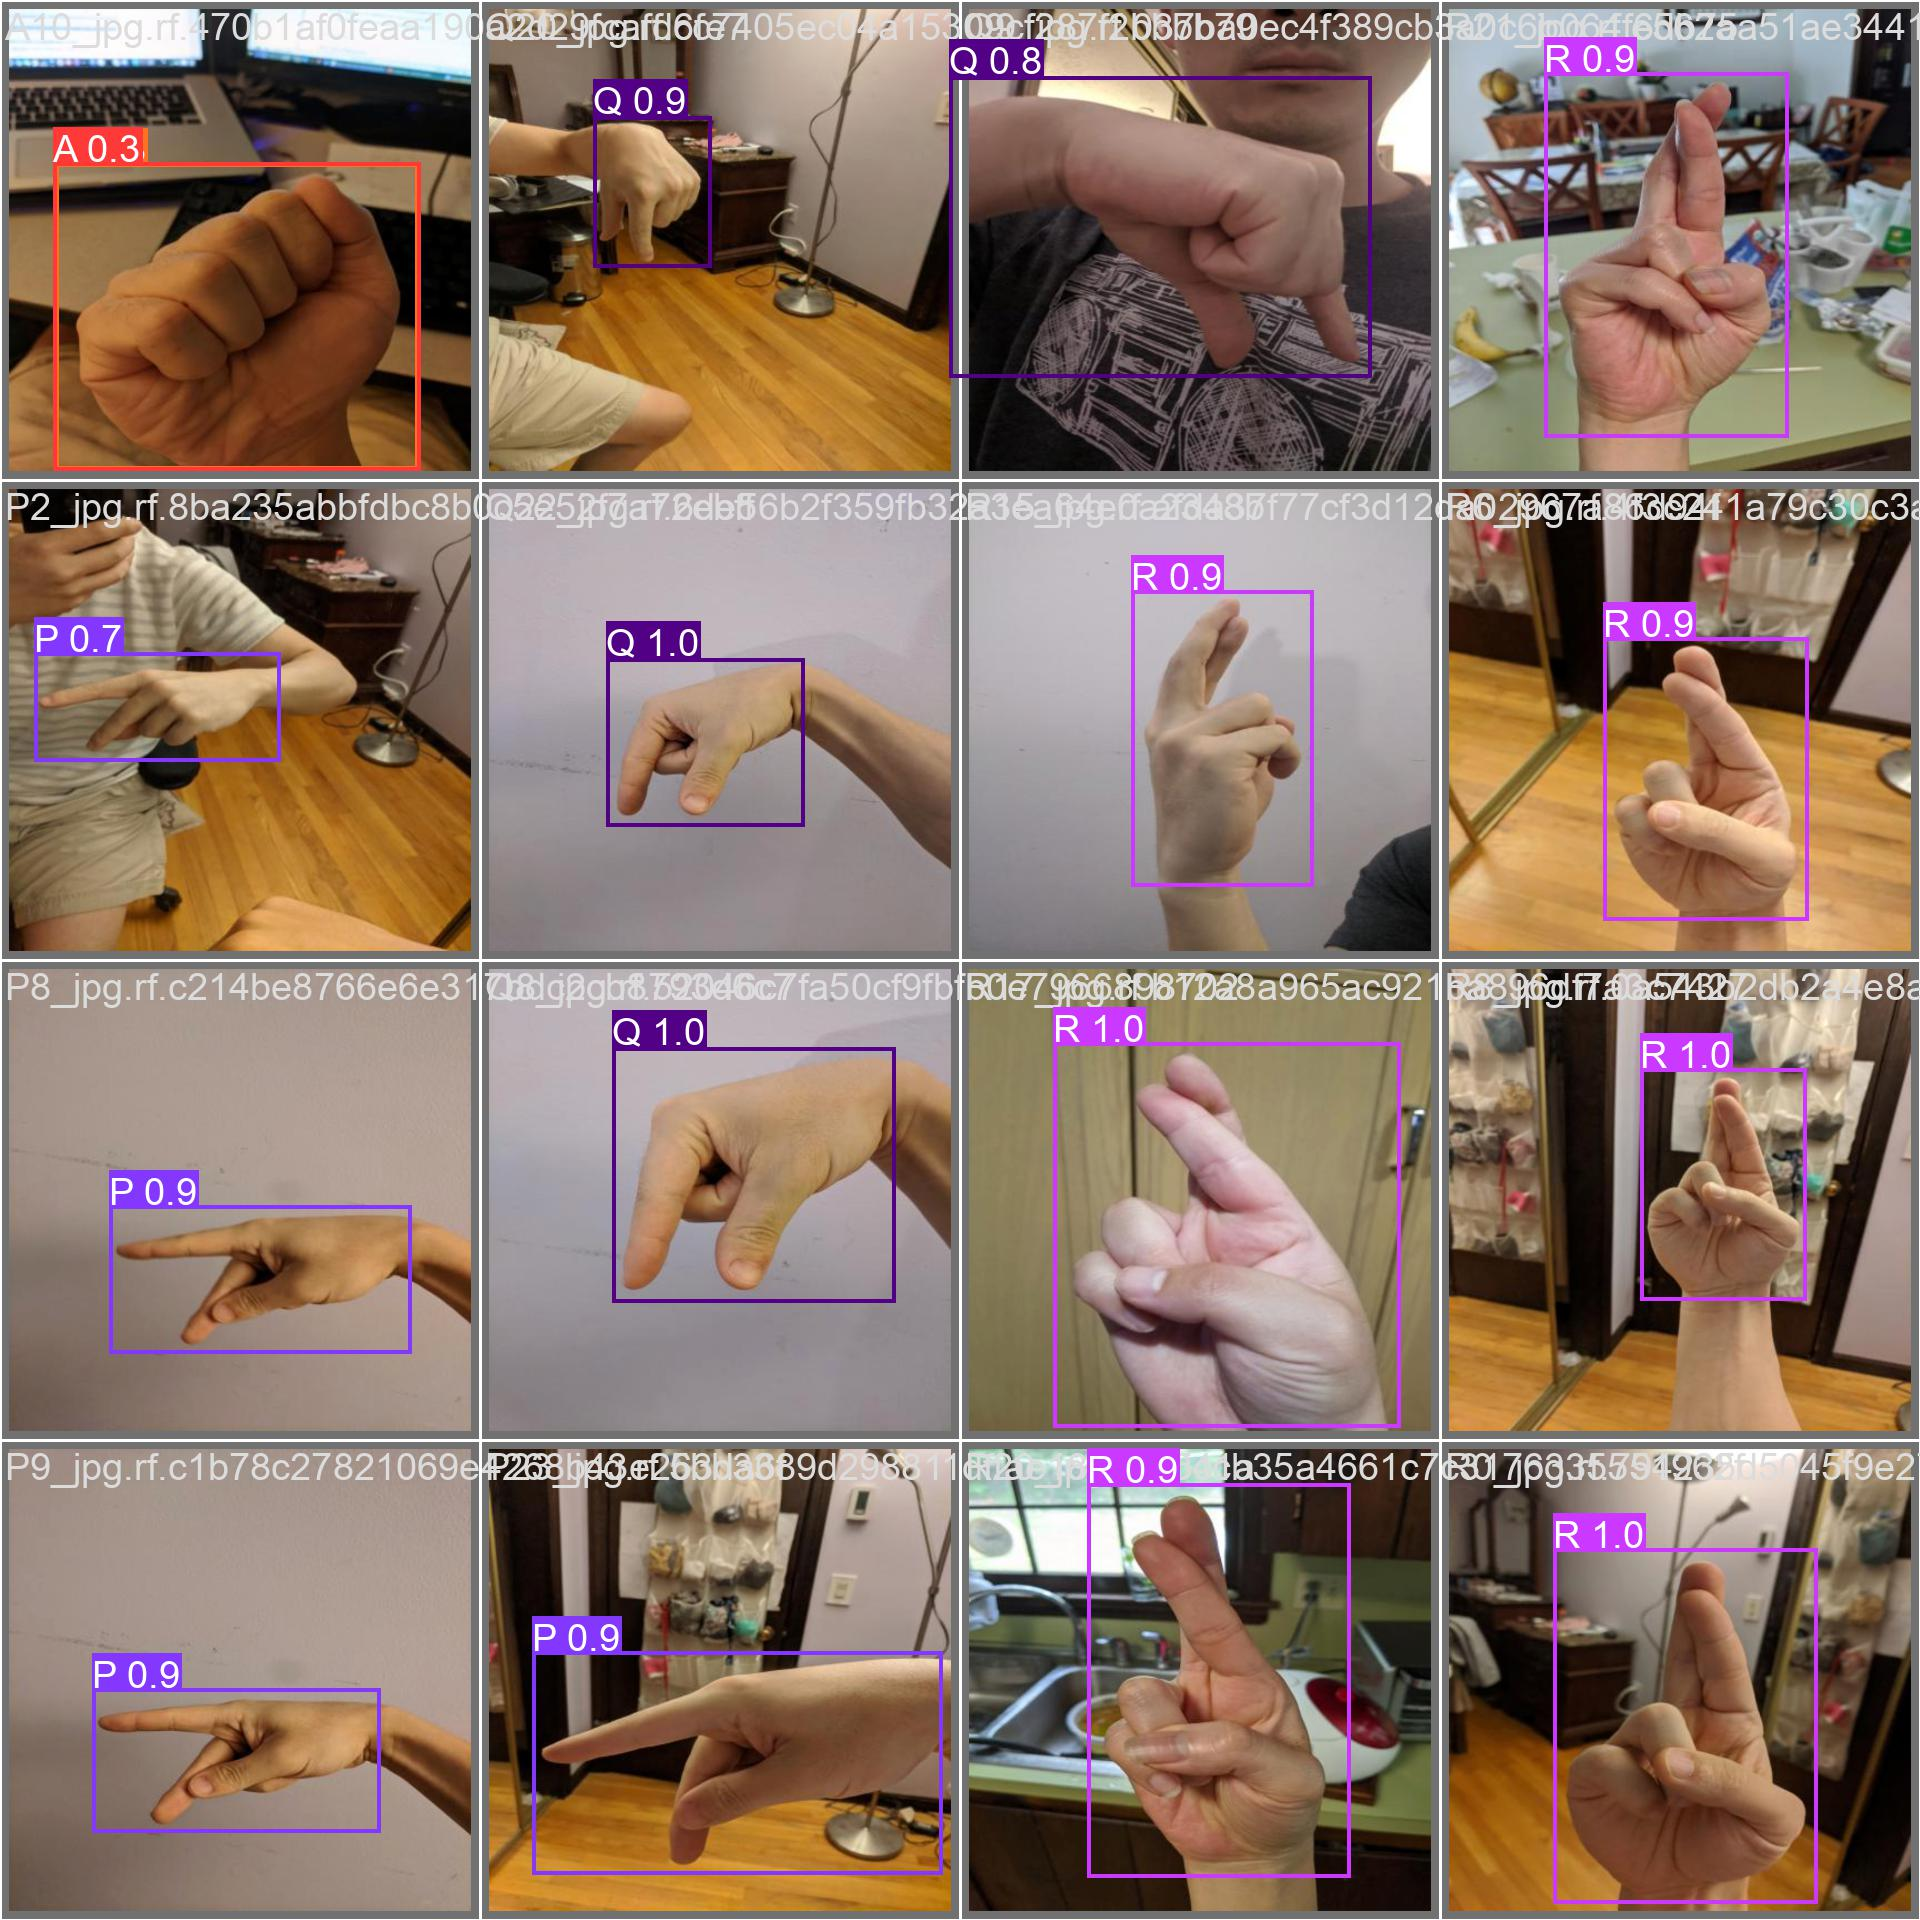

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43626654 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/datasets/American-Sign-Language-Letters-1/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:10<00:00,  1.19s/it]
                   all        144        144       0.95      0.898      0.977      0.819
                     A        144          5          1      0.663      0.995      0.862
                     B        144          9          1      0.798      0.995      0.873
                     C        144          3      0.938          1      0.995      0.815
                     D        144          6      0.963      0.833      0.955      0.817
                     E        144          4          1      0.955      0.995      0.849
         

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt save=True source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43626654 parameters, 0 gradients, 164.9 GFLOPs

image 1/72 /content/datasets/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg: 800x800 1 A, 77.3ms
image 2/72 /content/datasets/American-Sign-Language-Letters-1/test/images/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg: 800x800 1 B, 61.4ms
image 3/72 /content/datasets/American-Sign-Language-Letters-1/test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg: 800x800 1 B, 60.4ms
image 4/72 /content/datasets/American-Sign-Language-Letters-1/test/images/B19_jpg.rf.69527cc1f34d694cc04e55db80ed9b1a.jpg: 800x800 1 B, 59.6ms
image 5/72 /content/datasets/American-Sign-Language-Letters-1/test/images/C17_jpg.rf.ceb81f8ae3c3673bd060ebe71848eca8.jpg: 800x800 1 C, 61.1ms
image 6/72 /content/datasets/American-Sign-Language-Letters-1/test/images/C19_jpg.rf.577ce02a223c65e89dc4a

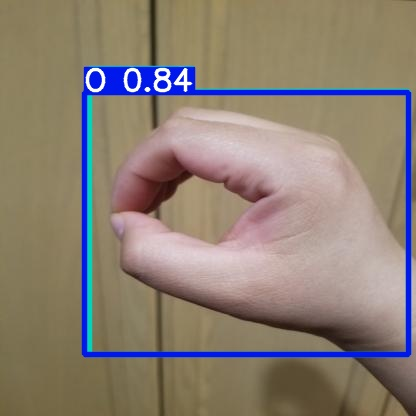

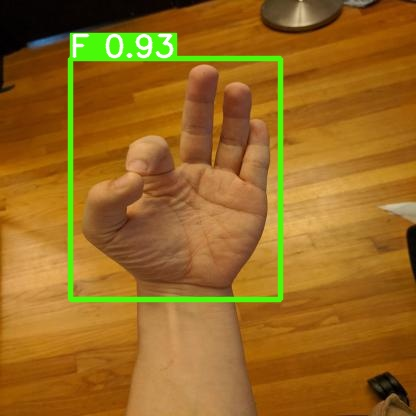

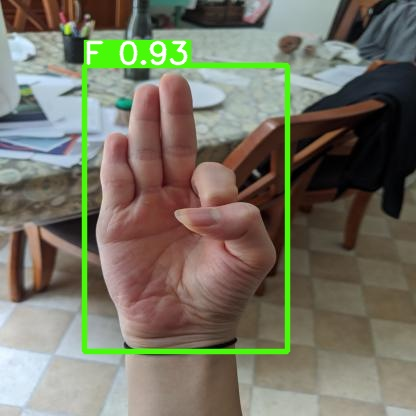

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt save=True source='/content/TestVideo/okay-ok.mp4'

/content
Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43626654 parameters, 0 gradients, 164.9 GFLOPs

video 1/1 (1/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 77.8ms
video 1/1 (2/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 43.9ms
video 1/1 (3/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 43.8ms
video 1/1 (4/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 43.2ms
video 1/1 (5/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 44.7ms
video 1/1 (6/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 43.2ms
video 1/1 (7/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 45.6ms
video 1/1 (8/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 43.7ms
video 1/1 (9/31) /content/TestVideo/okay-ok.mp4: 608x800 (no detections), 44.0ms
video 1/1 (10/31) /content/TestVideo/okay-ok.mp4: 608x800 1 K, 44.9ms
video 1/1 (11/31) /con